In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
import sys


In [46]:
FILENAME1 = "gpt-4.1_v1_results.json"
FILENAME2 = "smolLM2_1.7B_v1_results.json"
FILENAME3 = "gpt-oss.json"
FILENAME4 = "gpt-oss-system_v2.json"

In [68]:
# Load the data from the file
with open(FILENAME1, "r") as file:
    data1 = json.load(file)


with open(FILENAME2, "r") as file:
    data2 = json.load(file)

with open(FILENAME3, "r") as file:
    data3 = json.load(file)

with open(FILENAME4, "r") as file:
    data4 = json.load(file)

# Convert the data to a pandas DataFrame
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
df3 = pd.DataFrame(data3)
df4 = pd.DataFrame(data4)

dfs = [df1, df2, df3, df4]

# Get the passing rate total


In [71]:
def plot_failures(df):
    print(df.columns)
    df['STATUS'].value_counts(normalize=True)
    # If df['Comment] is greater than 10 words -> replace with "recursion limit"
    df['ERROR_CATEGORY'] = df['ERROR_CATEGORY'].apply(lambda x: "recursion limit" if len(x.split()) > 10 else x)
    # Create a Count Plot for the Reasons for Failures
    df_fail = df[df["STATUS"] == "FAIL"]

    fig, ax = plt.subplots(figsize=(10, 6))
    sns.countplot(x='ERROR_CATEGORY', data=df_fail, ax=ax)
    ax.set_xlabel('Category')
    plt.xticks(rotation=90)
    ax.set_ylabel('Count')
    plt.title("Failures by Category for GPT-OSS:20b w/ improved system prompt")
    plt.show()

Index(['STATUS', 'CATEGORY', 'COMMENT', 'ERROR_CATEGORY'], dtype='object')


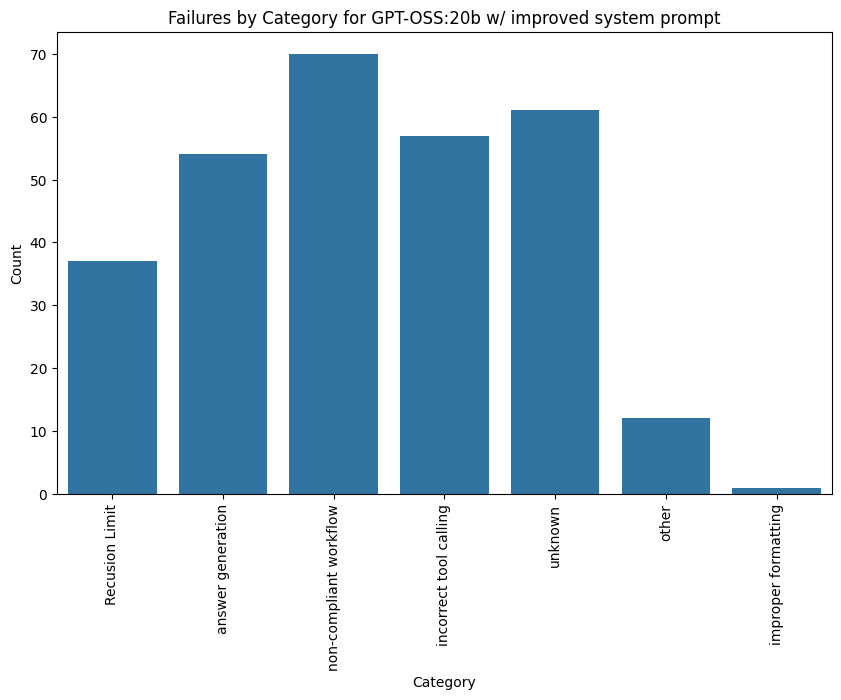

In [72]:
plot_failures(df4)